In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import numpy


Data = pd.read_csv("reddit_train.csv",sep=",",usecols=[1,2])
Data = Data.sample(frac=1).reset_index(drop=True)

Test = pd.read_csv("reddit_test.csv",sep=",")
Test = Test.sample(frac=1).reset_index(drop=True)





Data.head(5)

,comments,subreddits
0,Gotta get through Na'Vi first. People sleeping...,GlobalOffensive
1,You get upset if you don't get attention from ...,funny
2,You needed not to improvise: http://imgur.com/...,funny
3,&gt; covered in jam\n\nLibyan organic home mad...,europe
4,But surely the new ads on jerseys will decreas...,nba


In [2]:
Data.shape

(70000, 2)

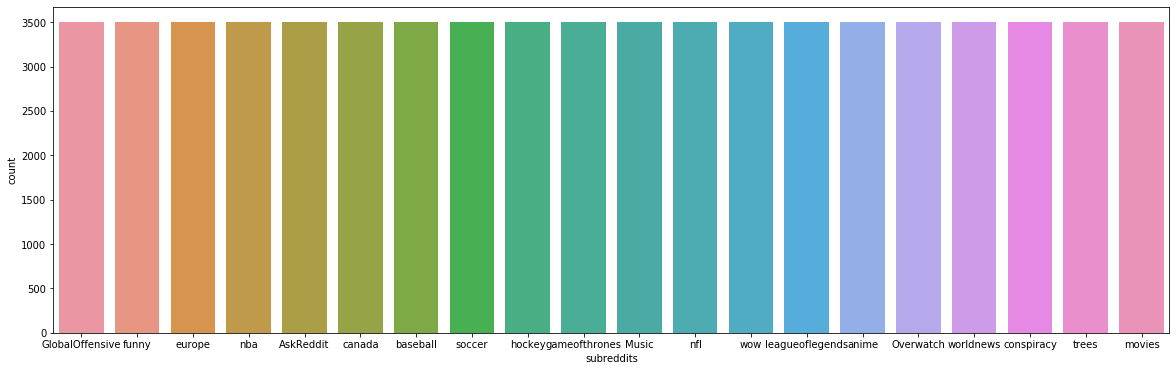

In [3]:
dims = (20, 6)
fig= plt.subplots(figsize=dims)
sb.countplot(x= 'subreddits' ,data=Data)

In [4]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
stopWords.add('url')
stopWords.add('user')
print(stopWords)


{'are', 'my', 'such', 'didn', 'did', 'mustn', 'and', "weren't", 'a', 'has', 'had', 'same', "haven't", 'who', 'for', "you're", 'what', 'm', 'now', 're', 'hers', "isn't", 'in', 'once', 'she', 'only', 'by', 'why', 'each', 'against', 'themselves', 'than', 'during', 'himself', 'doesn', 'wasn', 'further', 'his', 'other', 's', 'or', 'me', 'below', 'herself', "mustn't", 'am', 'ma', 'were', 'up', 'do', "it's", 'whom', "don't", 'shouldn', "shouldn't", 'where', 'which', "won't", 'both', 'doing', 'those', 'yourselves', 'd', 'into', 'when', 've', 'been', 'under', 'over', "needn't", 'here', 'just', 'he', 'an', 'there', 'them', 'with', 'hadn', "that'll", 'don', 'myself', 'until', 'to', 'needn', "should've", 'user', "couldn't", 'should', 'your', 'this', 'won', 'too', 'couldn', 'yourself', 'o', 'shan', 'haven', "you'll", 'isn', 'as', 'we', 'their', 'these', "shan't", 'ours', 'its', 'y', 'being', 'of', 'theirs', 'having', 'while', 'all', 'is', "you'd", "hadn't", "wasn't", "you've", 'above', 'you', 'her'

In [5]:
from sklearn import preprocessing
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()


def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:        
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)
#This lemmatization part is inspired by 'Lemmatize whole sentences with Python and nltk’s WordNetLemmatizer' see reference.
  

enc = preprocessing.LabelEncoder()

enc.fit(["nba","hockey","leagueoflegends","soccer","funny","movies","anime","Overwatch","trees","GlobalOffensive","nfl","AskReddit",
         "gameofthrones","conspiracy","worldnews","Music","wow","europe","canada","baseball"])



Data['comments']=Data['comments'].replace(to_replace=r'((www\.[^\s]+)|(https?://[^\s]+))', value='url', regex=True)
Data['comments']=Data['comments'].replace(to_replace=r'@[^\s]+', value='user', regex=True)
Data['comments']=Data.apply(lambda row: lemmatize_sentence(row['comments']), axis=1)


X_train= Data['comments']
y_train= enc.transform(Data['subreddits'])
X_test= Test['comments']





In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words=stopWords, ngram_range=(1, 1))
 

Xtrain=vec.fit_transform(X_train)
Xtest= vec.transform(X_test)

In [89]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5000,n_iter=5,random_state=0)
XtrainSVD=svd.fit_transform(Xtrain)
XtestSVD=svd.transform(Xtest)

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
binaryVec = CountVectorizer(stop_words=stopWords,ngram_range=(1,1),binary=True,max_features=10000)
XtrainBin=binaryVec.fit_transform(X_train)
XtestBin=binaryVec.transform(X_test)

10000